<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# importar los modelos de aprendizaje de máquina
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz

In [3]:
# Cargar datos
path = "./sampleFiles/reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
#Dividir el conjunto de datos en subconjuntos de entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, random_state=101)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [5]:
# Definición de función de pre-procesamiento
stopwords_sp = stopwords.words('spanish')

def preProcesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

In [6]:
# Utilización de pre-procesado y vectorización
tfidf_vect = TfidfVectorizer(preprocessor=preProcesado)

X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")


Tamaño de X_train (entrenamiento): (800, 3229)
Tamaño de X_test (prueba): (200, 3229)
Tamaño de y_train 800 y tamaño de y_test 200


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [7]:
# Inicializar los modelos ML
bayes = MultinomialNB()
logReg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dTree = DecisionTreeClassifier(class_weight='balanced')

In [8]:
# Entrenamiento de los modelos ML con método fit
bayes.fit(X_train, y_train)
logReg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dTree.fit(X_train, y_train);

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [9]:
# cálculo de predicciones para los modelos
y_pred_nb = bayes.predict(X_test)
y_pred_logreg = logReg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dTree.predict(X_test)


# imprimir métrica de exactitud
print(f"---- accuracy_score ----")
print(f"Naive Bayes: {metrics.accuracy_score(y_test, y_pred_nb)}")
print(f"Regresión Logística: {metrics.accuracy_score(y_test, y_pred_logreg)}")
print(f"Support Vector Machine: {metrics.accuracy_score(y_test, y_pred_svm)}")
print(f"Árbol de decisión: {metrics.accuracy_score(y_test, y_pred_dt)}")
print()

# impresión de otras métricas para modelos
metricas = [metrics.precision_score, metrics.recall_score, metrics.f1_score]

for metrica in metricas:
    print(f"---- {metrica.__name__} ----")
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label=data['product_category'].unique()[0])}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label=data['product_category'].unique()[0])}")
    print(f"Support Vector Machine: {metrica(y_test, y_pred_svm, pos_label=data['product_category'].unique()[0])}")
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label=data['product_category'].unique()[0])}")
    print()


---- accuracy_score ----
Naive Bayes: 0.845
Regresión Logística: 0.825
Support Vector Machine: 0.835
Árbol de decisión: 0.75

---- precision_score ----
Naive Bayes: 0.7745098039215687
Regresión Logística: 0.7888888888888889
Support Vector Machine: 0.7934782608695652
Árbol de decisión: 0.7126436781609196

---- recall_score ----
Naive Bayes: 0.9080459770114943
Regresión Logística: 0.8160919540229885
Support Vector Machine: 0.8390804597701149
Árbol de decisión: 0.7126436781609196

---- f1_score ----
Naive Bayes: 0.835978835978836
Regresión Logística: 0.8022598870056497
Support Vector Machine: 0.8156424581005586
Árbol de decisión: 0.7126436781609196



In [10]:
#Impresión de informes para los modelos
print("Informe de clasificación modelo Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Informe de clasificación modelo Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("Informe de clasificación modelo SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Informe de clasificación modelo Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()


Informe de clasificación modelo Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.77      0.91      0.84        87
 video_games       0.92      0.80      0.85       113

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.86      0.84      0.85       200


Informe de clasificación modelo Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.79      0.82      0.80        87
 video_games       0.85      0.83      0.84       113

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.83       200


Informe de clasificación modelo SVM
              precision    recall  f1-score   support

     jewelry       0.79      0.84      0.82        87
 video_games       0.87      0.83      0.85       113

    accuracy                           0.83     

###  `[BONUS: 3 pts]` Matriz de confusión

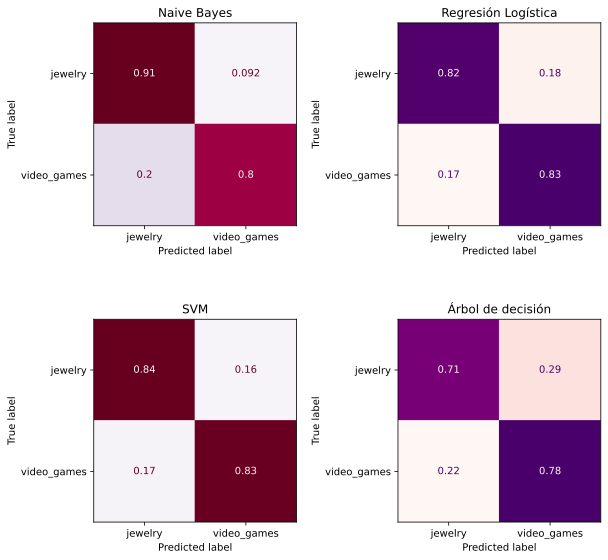

In [11]:
# impresión de matrices de confusión
%config InlineBackend.figure_format = 'svg'
fig = plt.figure(figsize=(10,10))

# impresión matriz de confusión naive bayes
ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(bayes, X_test, y_test, cmap="PuRd", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

# impresión matriz de confusión regresión logística
ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logReg, X_test, y_test, cmap = 'RdPu', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

# impresión matriz de confusión support vector machine
ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'PuRd', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

# impresión matriz de confusión decision tree
ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dTree, X_test, y_test, cmap = 'RdPu', ax=ax4, normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");


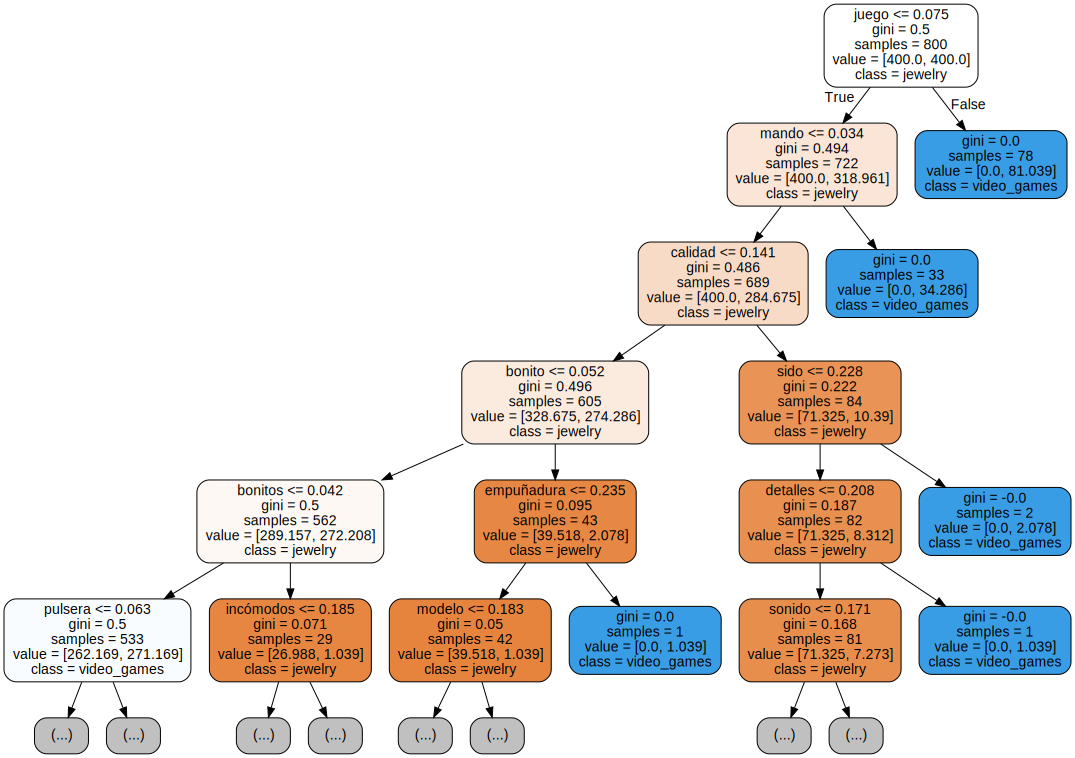

In [12]:
# impresión del árbol de decisión en 5 niveles de profundidad
viz = export_graphviz(dTree, 
                      out_file=None, # ¿Salvar en el computador?
                      max_depth=5, # Máxima profundidad
                      feature_names=list(dict(sorted(tfidf_vect.vocabulary_.items())).keys()), # Palabras
                      class_names = data['product_category'].unique(),
                      rounded=True, filled=True
                     )

graph = graphviz.Source(viz)
graph

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [13]:
# diccionario de términos
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab


{325: 'bonito',
 1729: 'llamativo',
 1735: 'llegado',
 2402: 'producto',
 2505: 'quiero',
 906: 'devuelvan',
 934: 'dinero',
 1301: 'favor',
 3137: 'ver',
 1347: 'foto',
 1733: 'llega',
 448: 'casa',
 2582: 'recopilación',
 2229: 'perfecta',
 655: 'continuar',
 2726: 'saga',
 2430: 'ps',
 1869: 'merece',
 1175: 'especialmente',
 2192: 'pena',
 1675: 'kh',
 994: 'dream',
 997: 'drop',
 958: 'distance',
 2574: 'recomendado',
 1295: 'fans',
 2501: 'quieran',
 2947: 'tener',
 1653: 'juegos',
 1913: 'misma',
 2287: 'plataforma',
 909: 'dia',
 1743: 'llego',
 2447: 'puedo',
 2089: 'opinar',
 2451: 'pues',
 2554: 'recibi',
 1941: 'momento',
 1300: 'fatal',
 1123: 'entrega',
 1182: 'espectacular',
 1674: 'justo',
 1185: 'esperaba',
 732: 'cumplido',
 2989: 'todas',
 1251: 'expectativas',
 1652: 'juego',
 345: 'brutal',
 2573: 'recomendable',
 706: 'cualquier',
 1294: 'fan',
 762: 'dbz',
 916: 'dicen',
 1125: 'entregado',
 2555: 'recibido',
 70: 'además',
 2565: 'reclamar',
 1133: 'entretenido'

In [14]:
print("Palabras que contribuyen a las clases para el modelo de Naive Bayes:")

# Las palabras que contribuyen a la clase 0 - bayes
[(vocab[e[0]], round(e[1],2)) for e in zip(bayes.feature_log_prob_ [0].argsort(), sorted(bayes.feature_log_prob_ [0]))][:10]

# Las palabras que contribuyen a la clase 1 - bayes
[(vocab[e[0]], round(e[1],2)) for e in zip(bayes.feature_log_prob_ [0].argsort(), sorted(bayes.feature_log_prob_ [0]))][-10:]

Palabras que contribuyen a las clases para el modelo de Naive Bayes:


[('pulsera', -6.23),
 ('plata', -6.21),
 ('buena', -6.14),
 ('regalo', -6.13),
 ('foto', -6.11),
 ('bonitos', -6.11),
 ('precio', -5.81),
 ('bonito', -5.79),
 ('bien', -5.79),
 ('calidad', -5.49)]

In [15]:

print("Palabras que contribuyen a las clases para el modelo de regresión logística:")

# Las palabras que contribuyen a la clase 0 - regresión logística
[(vocab[e[0]], round(e[1],2)) for e in zip(logReg.coef_[0].argsort(), sorted(logReg.coef_[0]))][:10]

# Las palabras que contribuyen a la clase 1 -regresión logística
[(vocab[e[0]], round(e[1],2)) for e in zip(logReg.coef_[0].argsort(), sorted(logReg.coef_[0]))][-10:]


Palabras que contribuyen a las clases para el modelo de regresión logística:


[('producto', 0.96),
 ('juegos', 1.04),
 ('perfecto', 1.07),
 ('cable', 1.08),
 ('jugar', 1.3),
 ('funciona', 1.31),
 ('ps', 1.33),
 ('solo', 1.4),
 ('mando', 1.9),
 ('juego', 3.58)]

In [16]:
print("Palabras que contribuyen a las clases para el modelo support vector machine:")

# Las palabras que contribuyen a la clase 0 - support vector machine
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][:10]

# Las palabras que contribuyen a la clase 1 -support vector machine
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][-10:]

Palabras que contribuyen a las clases para el modelo support vector machine:


[('hijo', 1.05),
 ('ratón', 1.08),
 ('jugar', 1.09),
 ('botones', 1.14),
 ('sonido', 1.21),
 ('funciona', 1.26),
 ('ps', 1.37),
 ('solo', 1.39),
 ('mando', 1.63),
 ('juego', 2.63)]

In [17]:
print("Palabras que contribuyen a las clases para el modelo árbol de decisión:")
# Árbol de decisión (feature importances)
[(vocab[e[0]],round(e[1],2)) for e in zip(dTree.feature_importances_.argsort(), sorted(dTree.feature_importances_))][-10:]

Palabras que contribuyen a las clases para el modelo árbol de decisión:


[('grande', 0.02),
 ('plata', 0.02),
 ('jugar', 0.02),
 ('foto', 0.02),
 ('pulsera', 0.03),
 ('bonitos', 0.03),
 ('bonito', 0.04),
 ('calidad', 0.04),
 ('mando', 0.06),
 ('juego', 0.11)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

* Ninguno de los modelos observados tiene un desempeño sobresaliente (superior al 95%) para el problema de clasificación planteado ya que las métricas así lo demuestran (teniendo en cuenta la exactitud y precisión), sin embargo los mejores modelos observados en términos de métricas de desempeño son la máquina de vectores de soporte y el modelo de Bayes en ese orden.
* Los modelos tienen un mejor desempeño al usar los datos de la columna "review_body" ya que se cuenta con un conjunto de palabras mas nutrido en comparación con la columna "review_title" que presenta un conjunto reducido.